In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import json

Extracting Relevant Tournament Data

In [64]:
with open('final_results.json', 'r') as f:
    data = json.load(f)

bot_results = data['bot_results'] 
bots = list(bot_results.keys())
total_games = [bot_results[bot]['total_games'] for bot in bots]
wins_as_white = [bot_results[bot]['wins_as_white'] for bot in bots]
wins_as_black = [bot_results[bot]['wins_as_black'] for bot in bots] 
draws = [bot_results[bot]['draws'] for bot in bots] 
elo_ratings = [bot_results[bot]['elo_rating'] for bot in bots] 

Creating DataFrame

In [65]:
df = pd.DataFrame({'Bot': bots, 'Total Games': total_games, 'Wins as White': wins_as_white, 'Wins as Black': wins_as_black, 'Draws': draws, 'Elo Rating': elo_ratings})
display(df)

,Bot,Total Games,Wins as White,Wins as Black,Draws,Elo Rating
0,mcts,350,131,134,35,2048.5
1,mcts_trained_pgn,350,147,153,20,2182.3
2,mcts_trained_puzzle,350,164,151,15,2248.6
3,nfsp,350,89,76,55,1782.7
4,ga,350,42,43,65,1548.9
5,ga_puzzle,350,68,57,75,1688.4
6,stockfish,350,148,137,25,2118.9
7,random,350,0,0,10,1252.8


Calculating Win and Draw Rates

In [66]:
df['Win Rate'] = (df['Wins as White'] + df['Wins as Black']) / df['Total Games']
df['Draw Rate'] = df['Draws'] / df['Total Games']

Plotting Win Rates

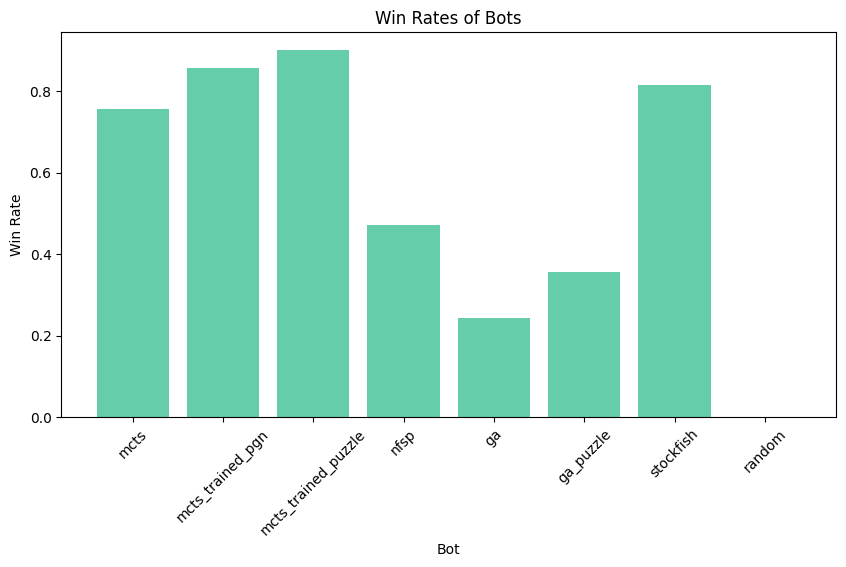

In [67]:
plt.figure(figsize=(10, 5))
plt.bar(df['Bot'], df['Win Rate'], color='mediumaquamarine')
plt.title('Win Rates of Bots')
plt.ylabel('Win Rate')
plt.xlabel('Bot')
plt.xticks(rotation=45)
plt.savefig("Tournament Evaluation Plots/win_rates.png", bbox_inches='tight')

Ploting Draw Rates

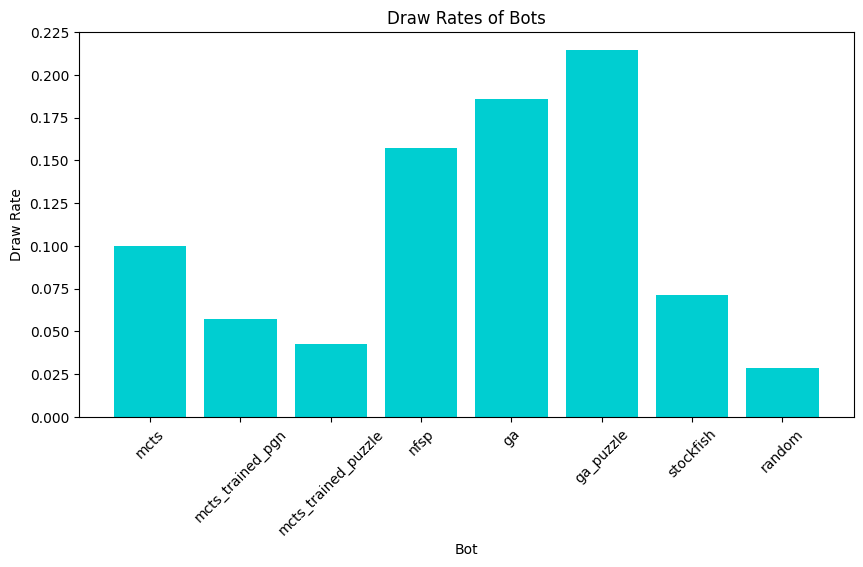

In [68]:
plt.figure(figsize=(10, 5))
plt.bar(df['Bot'], df['Draw Rate'], color='darkturquoise')
plt.title('Draw Rates of Bots')
plt.ylabel('Draw Rate')
plt.xlabel('Bot')
plt.xticks(rotation=45)
plt.savefig("Tournament Evaluation Plots/draw_rates.png", bbox_inches='tight')

Plotting Elo Ratings

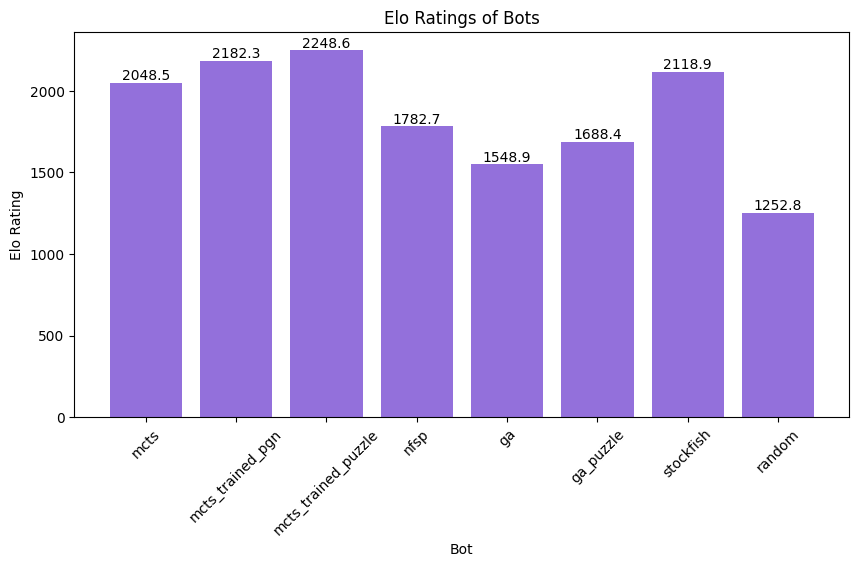

In [69]:
plt.figure(figsize=(10, 5))
bars = plt.bar(df['Bot'], df['Elo Rating'], color='mediumpurple')
plt.title('Elo Ratings of Bots')
plt.ylabel('Elo Rating')
plt.xlabel('Bot')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.savefig("Tournament Evaluation Plots/elo_ratings.png", bbox_inches='tight')